In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
# a function so we can show images later easily
def show_image(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    plt.show()

### 1

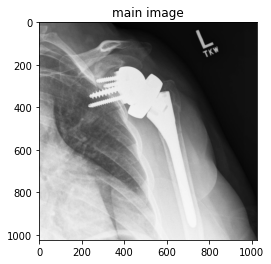

In [4]:
img = cv.imread('shoulder.jpg',0)
show_image(img, "main image")

### 2

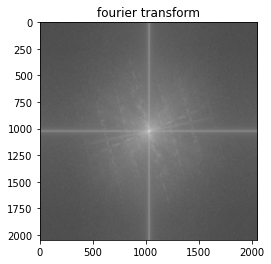

In [7]:
m, n = img.shape
new_image = cv.copyMakeBorder(img, 0, m, 0, n, cv.BORDER_CONSTANT,value= [0,0,0])
p, q = new_image.shape
f = np.fft.fft2(new_image)
fshift = np.fft.fftshift(f)
show_image(np.log(np.abs(fshift)), "fourier transform")

### 3

In [8]:
def ilp(p, q, d0):
    h = np.zeros((p, q))
    for i in range(p):
        for j in range(q):
            d = np.sqrt((i-p//2)**2 + (j-q//2)**2)
            if d<d0:
                h[i,j] = 1
            else:
                h[i,j] = 0

    return h

In [9]:
def blpf(p, q, d0, n):
    h = np.zeros((p, q))
    for i in range(p):
        for j in range(q):
            d = np.sqrt((i-p//2)**2 + (j-q//2)**2)
            h[i,j] = 1/((1+d/d0)**(2*n))

    return h

In [10]:
def glpf(p, q, d0):
    h = np.zeros((p, q))
    for i in range(p):
        for j in range(q):
            d = np.sqrt((i-p//2)**2 + (j-q//2)**2)
            h[i,j] = np.exp(-d**2/(2*d0**2))

    return h

### 4

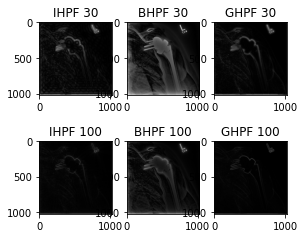

In [12]:

filtered_fshift = fshift * (1 - ilp(p, q, 30))
f_new = np.fft.ifftshift(filtered_fshift)
img_new = np.fft.ifft2(f_new)
ilp_30 = img_new[0:p//2, 0:q//2]

filtered_fshift = fshift * (1 - ilp(p, q, 100))
f_new = np.fft.ifftshift(filtered_fshift)
img_new = np.fft.ifft2(f_new)
ilp_100 = img_new[0:p//2, 0:q//2]

plt.subplot(242)
plt.imshow(abs(ilp_30), cmap = 'gray')
plt.title('IHPF 30')
plt.subplot(246)
plt.imshow(abs(ilp_100), cmap = 'gray')
plt.title('IHPF 100')

filtered_fshift = fshift * (1 - blpf(p, q, 30, 2))
f_new = np.fft.ifftshift(filtered_fshift)
img_new = np.fft.ifft2(f_new)
blpf_30 = img_new[0:p//2, 0:q//2]

filtered_fshift = fshift * (1 - blpf(p, q, 100, 2))
f_new = np.fft.ifftshift(filtered_fshift)
img_new = np.fft.ifft2(f_new)
blpf_100 = img_new[0:p//2, 0:q//2]

plt.subplot(243)
plt.imshow(abs(blpf_30), cmap = 'gray')
plt.title('BHPF 30')
plt.subplot(247)
plt.imshow(abs(blpf_100), cmap = 'gray')
plt.title('BHPF 100')

filtered_fshift = fshift * (1 - glpf(p, q, 30))
f_new = np.fft.ifftshift(filtered_fshift)
img_new = np.fft.ifft2(f_new)
glpf_30 = img_new[0:p//2, 0:q//2]

filtered_fshift = fshift * (1 - glpf(p, q, 100))
f_new = np.fft.ifftshift(filtered_fshift)
img_new = np.fft.ifft2(f_new)
glpf_100 = img_new[0:p//2, 0:q//2]

plt.subplot(244)
plt.imshow(abs(glpf_30), cmap = 'gray')
plt.title('GHPF 30')
plt.subplot(248)
plt.imshow(abs(glpf_100), cmap = 'gray')
plt.title('GHPF 100')

plt.show()